In [89]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [35]:
file01= "NBA_season1718_salary.csv"
file02="team_win_data.csv"

In [36]:
salary=pd.read_csv(file01, encoding="utf-8")
wins=pd.read_csv(file02, encoding="utf-8")

In [37]:
salary.head()

,Unnamed: 0,Player,Tm,season17_18
0,1,Stephen Curry,GSW,34682550.0
1,2,LeBron James,CLE,33285709.0
2,3,Paul Millsap,DEN,31269231.0
3,4,Gordon Hayward,BOS,29727900.0
4,5,Blake Griffin,DET,29512900.0


In [38]:
#rename Tm to Team_Abb so that we can merge it with thw wins dataset (see below)
salary=salary.rename(columns={ "Tm": "Team_Abb"})
salary.head()

,Unnamed: 0,Player,Team_Abb,season17_18
0,1,Stephen Curry,GSW,34682550.0
1,2,LeBron James,CLE,33285709.0
2,3,Paul Millsap,DEN,31269231.0
3,4,Gordon Hayward,BOS,29727900.0
4,5,Blake Griffin,DET,29512900.0


In [8]:
wins.head()

,Team Name,W,L,W/L%,GB,PS/G,PA/G,SRS,conference,Team_Abb
0,Toronto Raptors* (1),59,23,0.720,—,111.7,103.9,7.29,East,TOR
1,Boston Celtics* (2),55,27,0.671,4,104.0,100.4,3.23,East,BOS
2,Philadelphia 76ers* (3),52,30,0.634,7,109.8,105.3,4.30,East,PHI
3,Cleveland Cavaliers* (4),50,32,0.610,9,110.9,109.9,0.59,East,CLE
4,Indiana Pacers* (5),48,34,0.585,11,105.6,104.2,1.18,East,IND


In [11]:
#merge the two datasets
merged= pd.merge(wins, salary, on="Team_Abb")
merged.head()

,Team Name,W,L,W/L%,GB,PS/G,PA/G,SRS,conference,Team_Abb,Unnamed: 0,Player,season17_18
0,Toronto Raptors* (1),59,23,0.72,—,111.7,103.9,7.29,East,TOR,6,Kyle Lowry,28703704.0
1,Toronto Raptors* (1),59,23,0.72,—,111.7,103.9,7.29,East,TOR,10,DeMar DeRozan,27739975.0
2,Toronto Raptors* (1),59,23,0.72,—,111.7,103.9,7.29,East,TOR,40,Serge Ibaka,20061729.0
3,Toronto Raptors* (1),59,23,0.72,—,111.7,103.9,7.29,East,TOR,72,Jonas Valanciunas,15460675.0
4,Toronto Raptors* (1),59,23,0.72,—,111.7,103.9,7.29,East,TOR,144,C.J. Miles,7936509.0


In [25]:
#groupby Team_Abb
grouped=merged.groupby("Team_Abb")
grouped.head()

#Get the vins % and the slary for each team
salary_per_team=grouped["season17_18"].sum()
wins_per_team= grouped["W/L%"].unique()

wins_per_team=pd.DataFrame(wins_per_team)
wins_per_team.head()

,W/L%
Team_Abb,
ATL,[0.293]
BKN,[0.341]
BOS,[0.671]
CHA,[0.439]
CHI,[0.329]


In [26]:
salary_per_team= pd.DataFrame (salary_per_team)
salary_per_team.head()

,season17_18
Team_Abb,
ATL,100217797.0
BKN,96039772.0
BOS,115009962.0
CHA,117228164.0
CHI,89425042.0


In [100]:
#merge the two datasets (wins and salary)
merged= pd.merge(wins_per_team, salary_per_team, left_index= True, right_index=True)
merged.head()
merged=merged.rename(columns={"season17_18" : "salary for Season 17/18"})
merged.head()
merged["wins%"]=merged["W/L%"] * 100
merged=pd.DataFrame(merged)
merged.head()


,W/L%,salary for Season 17/18,wins%
Team_Abb,,,
ATL,[0.293],100217797.0,[29.3]
BKN,[0.341],96039772.0,[34.1]
BOS,[0.671],115009962.0,[67.1]
CHA,[0.439],117228164.0,[43.9]
CHI,[0.329],89425042.0,[32.9]


In [101]:
# convert wins% to numeric in order to be compatible with plot function
merged['wins%']=merged['wins%'].str[0]
merged.head()


,W/L%,salary for Season 17/18,wins%
Team_Abb,,,
ATL,[0.293],100217797.0,29.3
BKN,[0.341],96039772.0,34.1
BOS,[0.671],115009962.0,67.1
CHA,[0.439],117228164.0,43.9
CHI,[0.329],89425042.0,32.9


Text(0.5,1,'correlation between team salary and wins percentage nalysis')

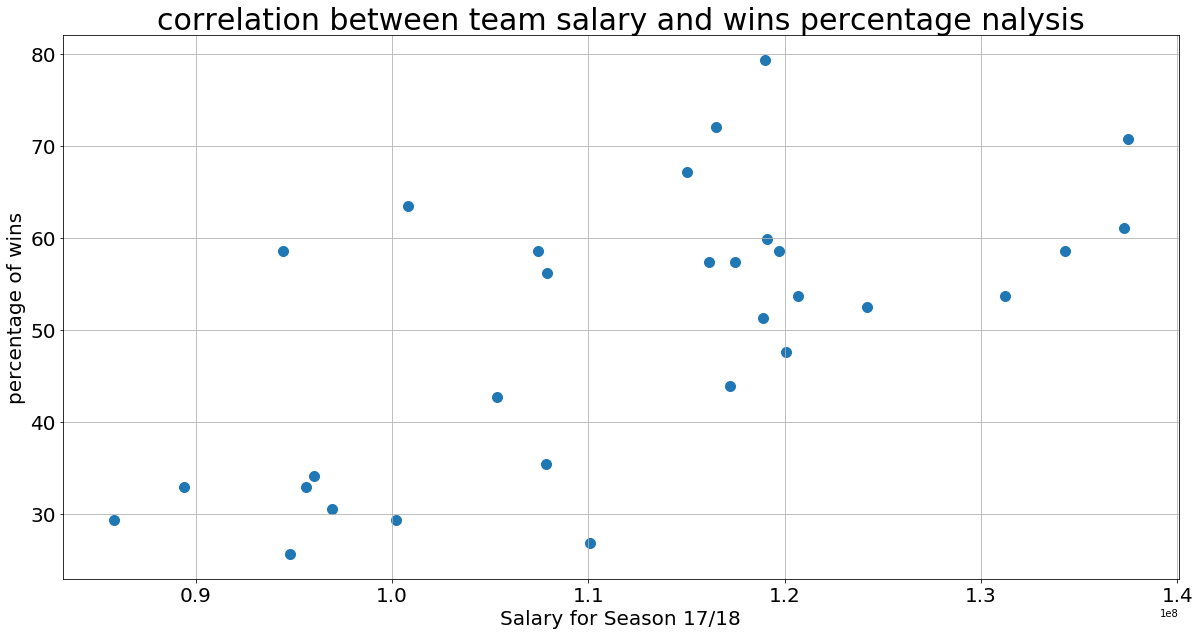

In [132]:

plot=merged.plot(kind="scatter", x="salary for Season 17/18", y="wins%", s= 100,fontsize=20,
      grid=True, figsize=(20,10),title="correlation between team salary and wins percentage nalysis")

plt.xlabel("Salary for Season 17/18", size=20)
plt.ylabel("percentage of wins", size=20)
plt.title("correlation between team salary and wins percentage nalysis",size=30)


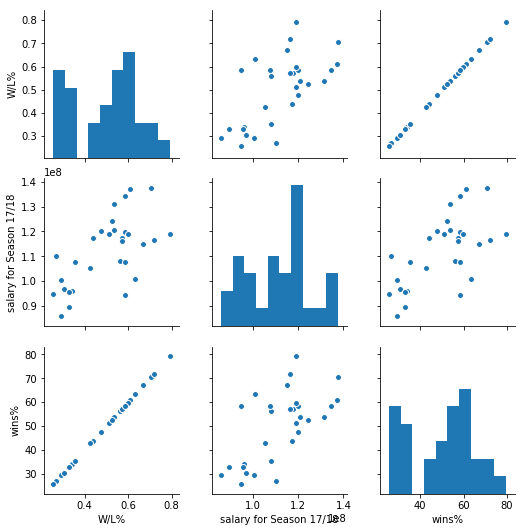

In [133]:
sns.pairplot(merged, kind="scatter")

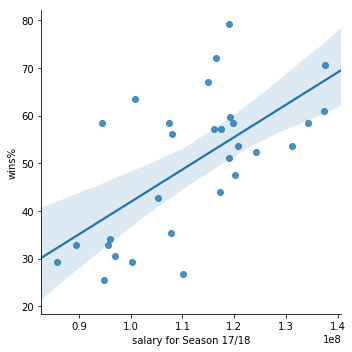

In [105]:
sns.lmplot(x="salary for Season 17/18", y="wins%",data=merged,fit_reg=True) 

In [139]:
#calulate the linear regression r-squared and p.value
slope, intercept, r_value, p_value, std_err = stats.linregress(x=merged["salary for Season 17/18"], y=merged["wins%"])
r_squared=r_value**2
print("r_squared = " , r_squared )
print("p_value = ", p_value)

r_squared =  0.406726450637
p_value =  0.000150062268394
